In [1]:
##Getting things set up
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
import matplotlib.pyplot as plt
import time
#import numpy as np



In [53]:
##Defining 3 optimzation problems###
#1- four peaks
length1=10
fitness_fn1= mlrose.FourPeaks()
optprob1= mlrose.DiscreteOpt(length1,fitness_fn1)

#2- sum of the 1 values
length2=10
fitness_fn2= mlrose.OneMax()
optprob2= mlrose.DiscreteOpt(length2,fitness_fn2) ##Should this be continuous???

#3- maxKcolor
length3=10
edges= [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,0), (0,8), (8,1), (8,2), (8,5), (8,6), (8,7), (9, 2), (9,3), (9,4), (9,5)]
fitness_fn3= mlrose.MaxKColor(edges)
optprob3=mlrose.DiscreteOpt(length3,fitness_fn3, maximize=False, max_val=3)

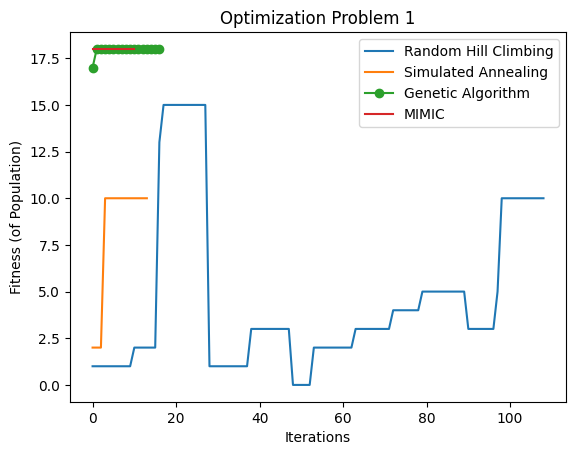

time for random hill-climbing is 0.004537820816040039
time for simulated annealing is 0.0004489421844482422
time for genetic algorithm is 0.3176541328430176
time for mimic is 0.5503449440002441


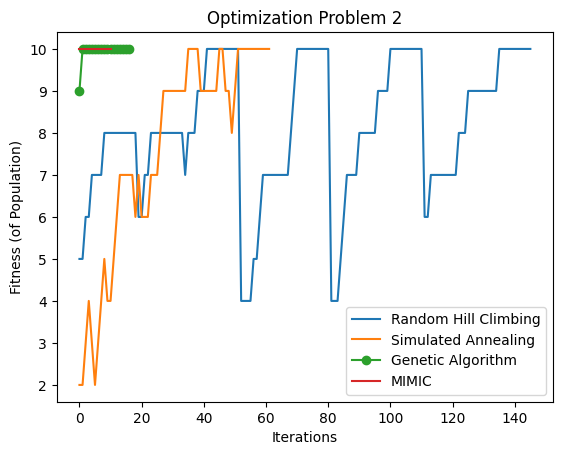

time for random hill-climbing is 0.0042040348052978516
time for simulated annealing is 0.002824068069458008
time for genetic algorithm is 0.341411828994751
time for mimic is 0.5453581809997559


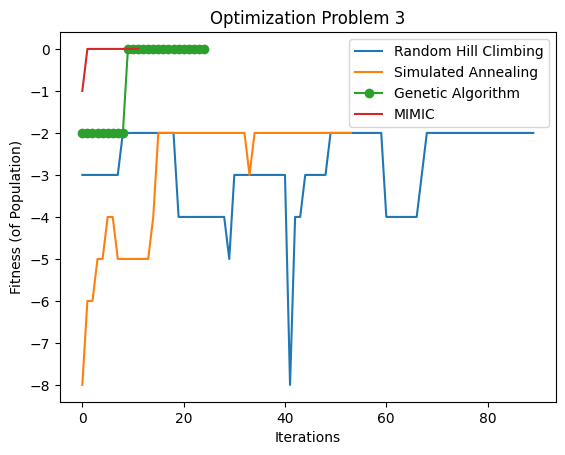

time for random hill-climbing is 0.004730939865112305
time for simulated annealing is 0.003144979476928711
time for genetic algorithm is 0.6524112224578857
time for mimic is 0.7050638198852539


In [54]:
#iterate to keep it simple
n=1
for optprob in [optprob1, optprob2, optprob3]:
    time0=time.time()
    [beststaterhc, bestfitrhc, rhccurve]= mlrose.random_hill_climb(optprob, restarts=5, curve=True, random_state=215)
    time1=time.time()
    [beststatesa, bestfitsa, sacurve]=mlrose.simulated_annealing(optprob, curve=True, random_state=211)
    time2=time.time()
    [beststatega, bestfitga, gacurve]=mlrose.genetic_alg(optprob, mutation_prob= 0.15, max_attempts= 15, curve=True, random_state=212) #max_attempts= 15,
    time3=time.time()
    [beststatemimic, bestfitmimic, mimiccurve]=mlrose.mimic(optprob,  curve=True, random_state=212) #max_attempts=15,
    time4=time.time()

    #Graph it
    import matplotlib.pyplot as plt
    plt.plot(rhccurve)
    plt.plot(sacurve)
    plt.plot(gacurve, '-o')
    plt.plot(mimiccurve)
    plt.legend(["Random Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"])
    plt.xlabel("Iterations")
    plt.ylabel("Fitness (of Population)")
    plt.title("Optimization Problem " + str(n))
    plt.show()

    #Time performance
    rhctime=time1-time0
    satime=time2-time1
    gatime= time3-time2
    mimictime=time4-time3
    print("time for random hill-climbing is " + str(rhctime))
    print("time for simulated annealing is " + str(satime))
    print("time for genetic algorithm is " + str(gatime))
    print("time for mimic is " + str(mimictime))
    n+=1


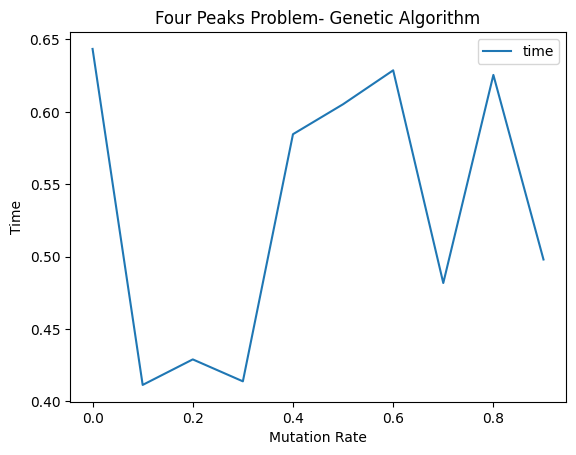

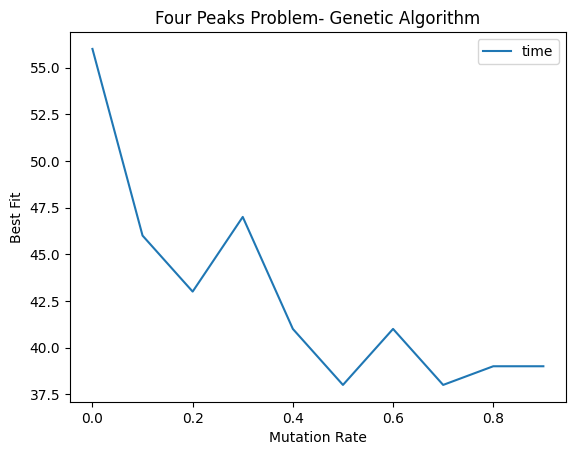

In [35]:
#1- four peaks
length1=30
fitness_fn1= mlrose.FourPeaks()
optprob= mlrose.DiscreteOpt(length1,fitness_fn1)

timelist=[]
mutvals=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
bestfitlist=[]
for mut in mutvals:
    #time0=time.time()
    #[beststaterhc, bestfitrhc, rhccurve]= mlrose.random_hill_climb(optprob, restarts=5, curve=True, random_state=215)
    #time1=time.time()
    #[beststatesa, bestfitsa, sacurve]=mlrose.simulated_annealing(optprob, curve=True, random_state=211)
    time2=time.time()
    [beststatega, bestfitga, gacurve]=mlrose.genetic_alg(optprob, mutation_prob= mut, max_attempts= 15, curve=True, random_state=212) #max_attempts= 15,
    time3=time.time()
    #[beststatemimic, bestfitmimic, mimiccurve]=mlrose.mimic(optprob,  curve=True, random_state=212) #max_attempts=15,
    #time4=time.time()

    #Graph it
    timeval=time3-time2
    timelist.append(timeval)
    bestfitlist.append(bestfitga)

import matplotlib.pyplot as plt
plt.plot(mutvals, timelist)
plt.legend(["time"])
plt.xlabel("Mutation Rate")
plt.ylabel("Time")
plt.title("Four Peaks Problem- Genetic Algorithm")
plt.show()
plt.plot(mutvals, bestfitlist)
plt.legend(["time"])
plt.xlabel("Mutation Rate")
plt.ylabel("Best Fit")
plt.title("Four Peaks Problem- Genetic Algorithm")
plt.show()




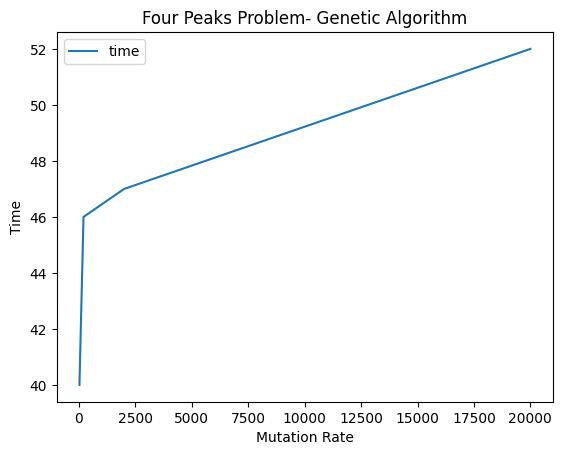

In [37]:

popvals=[20,200,2000,20000]
vallist=[]
for pop in popvals:
    #time0=time.time()
    #[beststaterhc, bestfitrhc, rhccurve]= mlrose.random_hill_climb(optprob, restarts=5, curve=True, random_state=215)
    #time1=time.time()
    #[beststatesa, bestfitsa, sacurve]=mlrose.simulated_annealing(optprob, curve=True, random_state=211)
    time2=time.time()
    [beststatega, bestfitga, gacurve]=mlrose.genetic_alg(optprob, mutation_prob= 0.1, pop_size= pop, max_attempts= 15, curve=True, random_state=212) #max_attempts= 15,
    time3=time.time()
    #[beststatemimic, bestfitmimic, mimiccurve]=mlrose.mimic(optprob,  curve=True, random_state=212) #max_attempts=15,
    #time4=time.time()

    #Graph it
    vallist.append(bestfitga)

plt.plot(popvals, vallist)
plt.legend(["time"])
plt.xlabel("Population Size")
plt.ylabel("Fitness of Population")
plt.title("Four Peaks Problem- Genetic Algorithm")
plt.show()

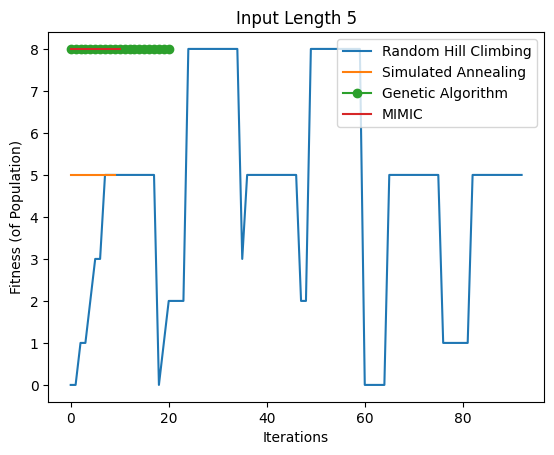

time for random hill-climbing is 0.003731966018676758
time for simulated annealing is 0.00040721893310546875
time for genetic algorithm is 0.37262797355651855
time for mimic is 0.16284489631652832


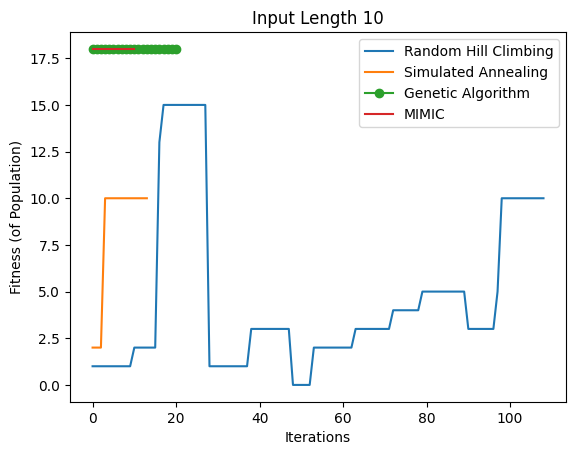

time for random hill-climbing is 0.001940011978149414
time for simulated annealing is 0.00044798851013183594
time for genetic algorithm is 0.4815962314605713
time for mimic is 0.5433259010314941


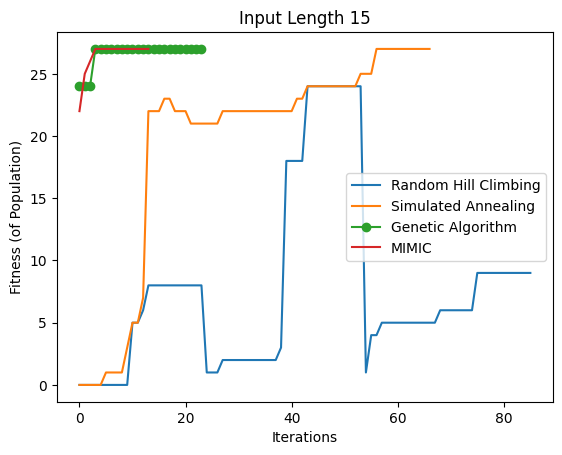

time for random hill-climbing is 0.0019850730895996094
time for simulated annealing is 0.0017118453979492188
time for genetic algorithm is 0.43686914443969727
time for mimic is 1.4726588726043701


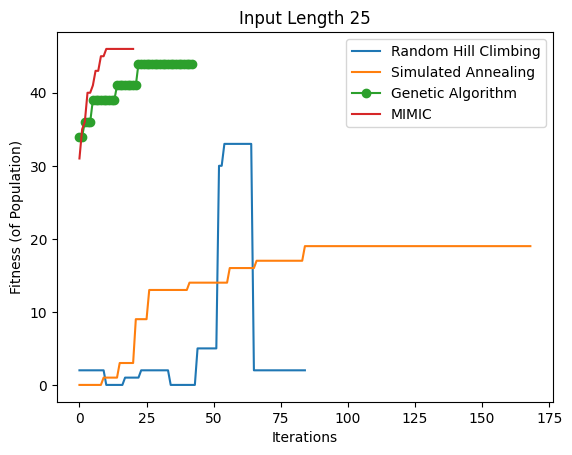

time for random hill-climbing is 0.0022470951080322266
time for simulated annealing is 0.005319118499755859
time for genetic algorithm is 0.7537260055541992
time for mimic is 6.260747909545898


In [59]:
#iterate to keep it simple
n=1
lengths=[5, 10, 15, 25]
for length in lengths:
    fitness_fn1= mlrose.FourPeaks()
    optprob= mlrose.DiscreteOpt(length,fitness_fn1)
    time0=time.time()
    [beststaterhc, bestfitrhc, rhccurve]= mlrose.random_hill_climb(optprob, restarts=5, curve=True, random_state=215)
    time1=time.time()
    [beststatesa, bestfitsa, sacurve]=mlrose.simulated_annealing(optprob, curve=True, random_state=211)
    time2=time.time()
    [beststatega, bestfitga, gacurve]=mlrose.genetic_alg(optprob, mutation_prob= 0.1,  curve=True, max_attempts= 20,random_state=212) #max_attempts= 15,
    time3=time.time()
    [beststatemimic, bestfitmimic, mimiccurve]=mlrose.mimic(optprob,  curve=True, random_state=212) #max_attempts=15,
    time4=time.time()

    #Graph it
    import matplotlib.pyplot as plt
    plt.plot(rhccurve)
    plt.plot(sacurve)
    plt.plot(gacurve, '-o')
    plt.plot(mimiccurve)
    plt.legend(["Random Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"])
    plt.xlabel("Iterations")
    plt.ylabel("Fitness (of Population)")
    plt.title("Input Length " + str(length))
    plt.show()

    #Time performance
    rhctime=time1-time0
    satime=time2-time1
    gatime= time3-time2
    mimictime=time4-time3
    print("time for random hill-climbing is " + str(rhctime))
    print("time for simulated annealing is " + str(satime))
    print("time for genetic algorithm is " + str(gatime))
    print("time for mimic is " + str(mimictime))
    n+=1

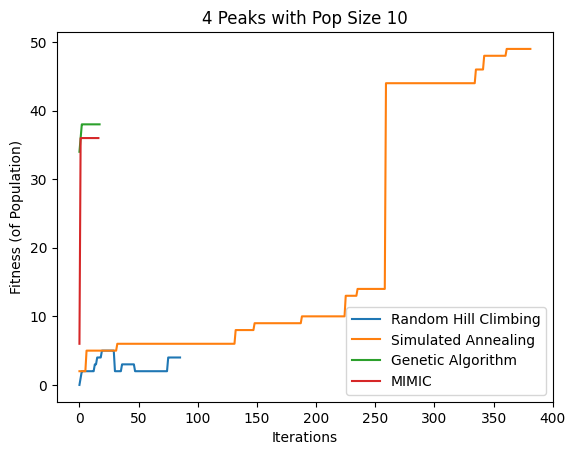

time for random hill-climbing is 0.003553152084350586
time for simulated annealing is 0.020918846130371094
time for genetic algorithm is 0.045716047286987305
time for mimic is 7.258944034576416


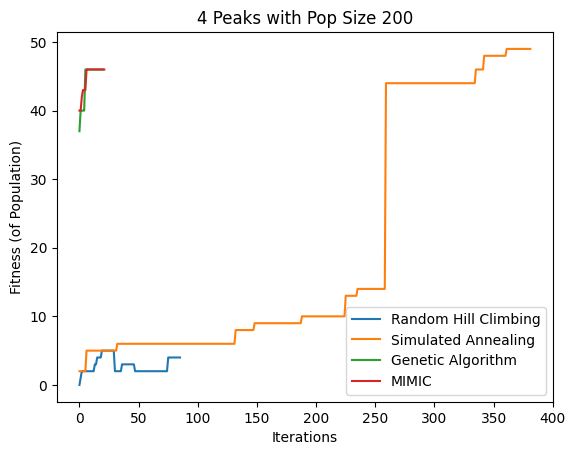

time for random hill-climbing is 0.0021829605102539062
time for simulated annealing is 0.011010169982910156
time for genetic algorithm is 0.41031384468078613
time for mimic is 9.888318061828613


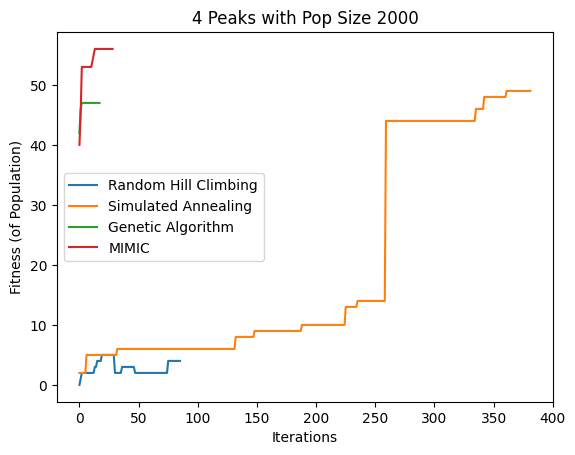

time for random hill-climbing is 0.0018069744110107422
time for simulated annealing is 0.011526823043823242
time for genetic algorithm is 3.864943265914917
time for mimic is 14.445750951766968


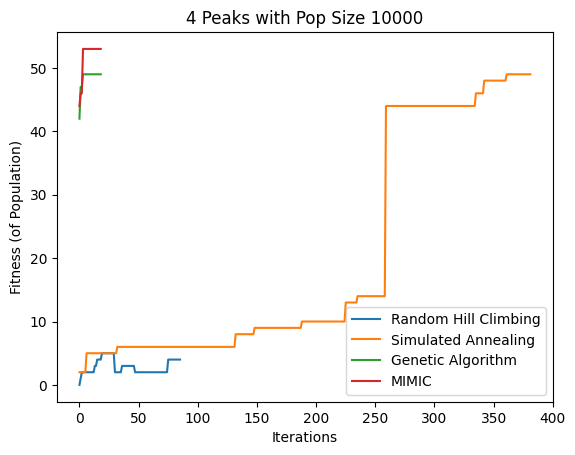

time for random hill-climbing is 0.0015957355499267578
time for simulated annealing is 0.01051020622253418
time for genetic algorithm is 37.049882888793945
time for mimic is 16.491762161254883


In [45]:
#genetic algorithm
#1- four peaks
length1=30
fitness_fn1= mlrose.FourPeaks()
optprob1= mlrose.DiscreteOpt(length1,fitness_fn1)
popsize=[10, 200, 2000, 10000]
for pop in popsize:
    time0=time.time()
    [beststaterhc, bestfitrhc, rhccurve]= mlrose.random_hill_climb(optprob, restarts=5, curve=True, random_state=215)
    time1=time.time()
    [beststatesa, bestfitsa, sacurve]=mlrose.simulated_annealing(optprob, curve=True, random_state=211)
    time2=time.time()
    [beststatega, bestfitga, gacurve]=mlrose.genetic_alg(optprob, pop_size= pop, mutation_prob= 0.1, max_attempts= 15, curve=True, random_state=212) #max_attempts= 15,
    time3=time.time()
    [beststatemimic, bestfitmimic, mimiccurve]=mlrose.mimic(optprob, pop_size= pop, curve=True, max_attempts= 15, 
    random_state=212) #max_attempts=15,
    time4=time.time()

    #Graph it
    import matplotlib.pyplot as plt
    plt.plot(rhccurve)
    plt.plot(sacurve)
    plt.plot(gacurve)
    plt.plot(mimiccurve)
    plt.legend(["Random Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"])
    plt.xlabel("Iterations")
    plt.ylabel("Fitness (of Population)")
    plt.title("4 Peaks with Pop Size " + str(pop))
    plt.show()

    #Time performance
    rhctime=time1-time0
    satime=time2-time1
    gatime= time3-time2
    mimictime=time4-time3
    print("time for random hill-climbing is " + str(rhctime))
    print("time for simulated annealing is " + str(satime))
    print("time for genetic algorithm is " + str(gatime))
    print("time for mimic is " + str(mimictime))
    n+=1


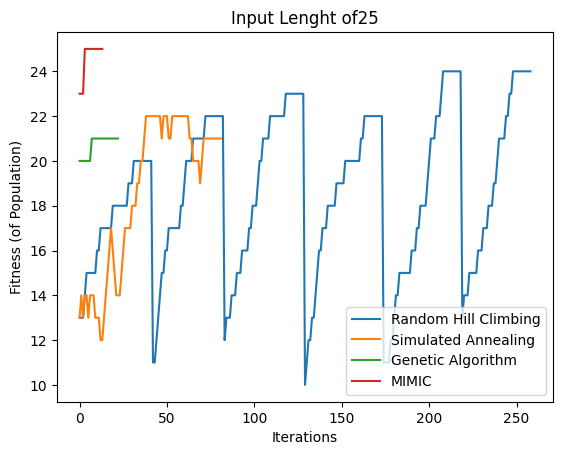

time for random hill-climbing is 0.009950876235961914
time for simulated annealing is 0.005496025085449219
time for genetic algorithm is 0.48812198638916016
time for mimic is 4.432435989379883


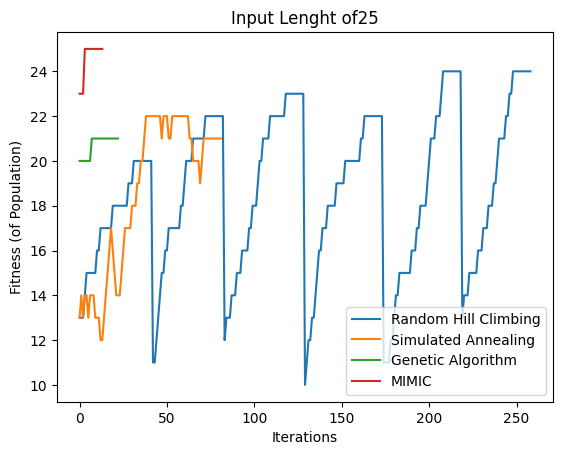

time for random hill-climbing is 0.007620096206665039
time for simulated annealing is 0.003412961959838867
time for genetic algorithm is 0.5090899467468262
time for mimic is 4.405833005905151


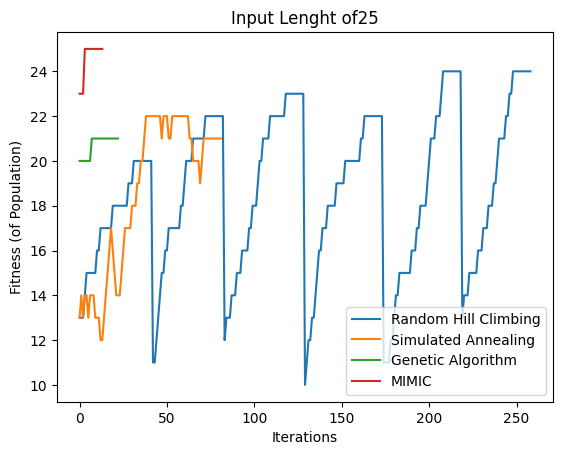

time for random hill-climbing is 0.009786128997802734
time for simulated annealing is 0.0033719539642333984
time for genetic algorithm is 0.5106539726257324
time for mimic is 4.402193784713745


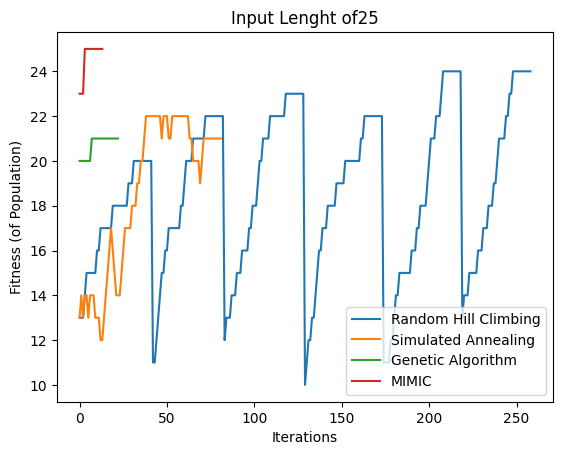

time for random hill-climbing is 0.007077932357788086
time for simulated annealing is 0.003962039947509766
time for genetic algorithm is 0.47510313987731934
time for mimic is 4.236658811569214


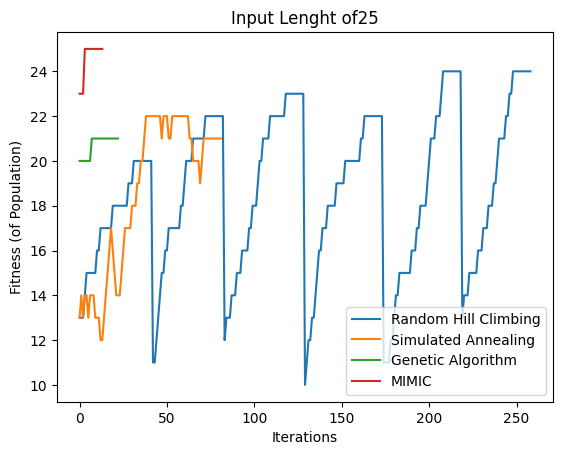

time for random hill-climbing is 0.0074732303619384766
time for simulated annealing is 0.0037338733673095703
time for genetic algorithm is 0.4700911045074463
time for mimic is 4.377165794372559


In [64]:
#2- sum of the 1 values
#iterate to keep it simple
lengths=[1,5,10,20,30]
for lenghth in lengths:
    fitness_fn2= mlrose.OneMax()
    optprob= mlrose.DiscreteOpt(length,fitness_fn2)
    time0=time.time()
    [beststaterhc, bestfitrhc, rhccurve]= mlrose.random_hill_climb(optprob, restarts=5, curve=True, random_state=215)
    time1=time.time()
    [beststatesa, bestfitsa, sacurve]=mlrose.simulated_annealing(optprob, curve=True, random_state=211)
    time2=time.time()
    [beststatega, bestfitga, gacurve]=mlrose.genetic_alg(optprob, mutation_prob= 0.15, max_attempts= 15, curve=True, random_state=212) #max_attempts= 15,
    time3=time.time()
    [beststatemimic, bestfitmimic, mimiccurve]=mlrose.mimic(optprob,  curve=True, random_state=212) #max_attempts=15,
    time4=time.time()

    #Graph it
    import matplotlib.pyplot as plt
    plt.plot(rhccurve)
    plt.plot(sacurve)
    plt.plot(gacurve)
    plt.plot(mimiccurve)
    plt.legend(["Random Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"])
    plt.xlabel("Iterations")
    plt.ylabel("Fitness (of Population)")
    plt.title("Input Length of" + str(length))
    plt.show()

    #Time performance
    rhctime=time1-time0
    satime=time2-time1
    gatime= time3-time2
    mimictime=time4-time3
    print("time for random hill-climbing is " + str(rhctime))
    print("time for simulated annealing is " + str(satime))
    print("time for genetic algorithm is " + str(gatime))
    print("time for mimic is " + str(mimictime))
    n+=1
